1. Class Distribution

- Plot number of images per class.
- Check if some classes have much fewer images than others.
- Note possible imbalance problems.

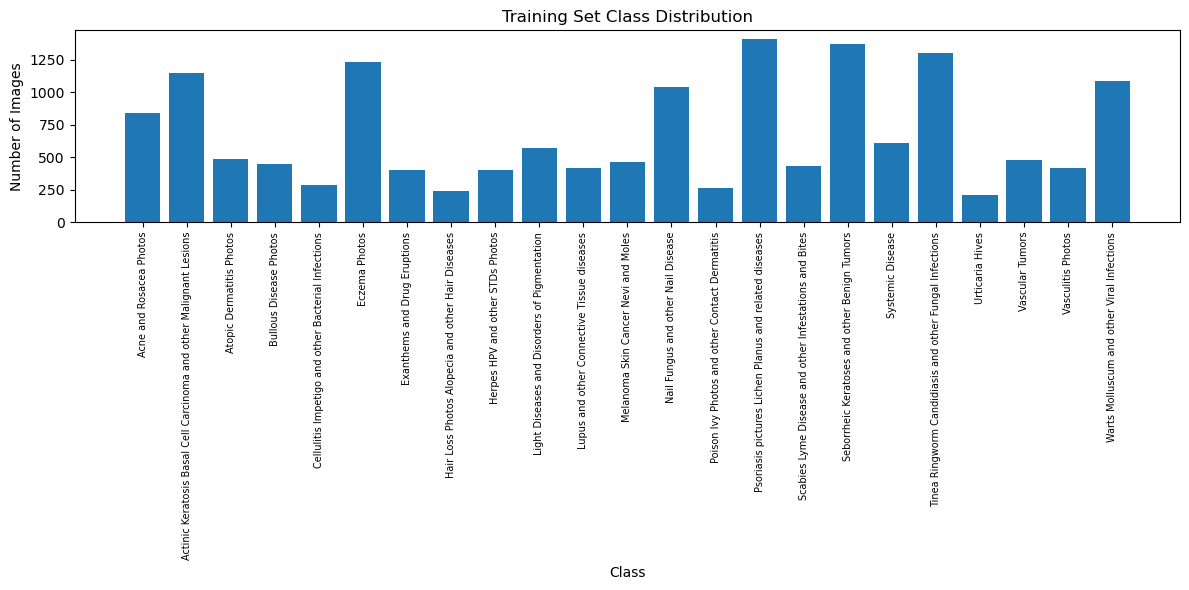

In [2]:
import os
import glob
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

train_dir = 'E:/CY Tech/Big Data project/Project 2 DermNet Skin Disease Classification/Data/Raw/train'
test_dir = 'E:/CY Tech/Big Data project/Project 2 DermNet Skin Disease Classification/Data/Raw/test'

# rebuild train_counts
def count_images(folder):
    rows = []
    for c in sorted([d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]):
        pattern = os.path.join(folder, c, '*')
        n_imgs = len([p for p in glob.glob(pattern) if os.path.isfile(p)])
        rows.append((c, n_imgs))
    return pd.DataFrame(rows, columns=['class', 'count'])

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Step 1: Class distribution plot

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(train_counts['class'], train_counts['count'])
plt.xticks(rotation=90, fontsize=7)
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

2. Image Quality Check

- Display a few images from several classes.
- Look for brightness differences.
- Check if images are consistent in shape and clarity.

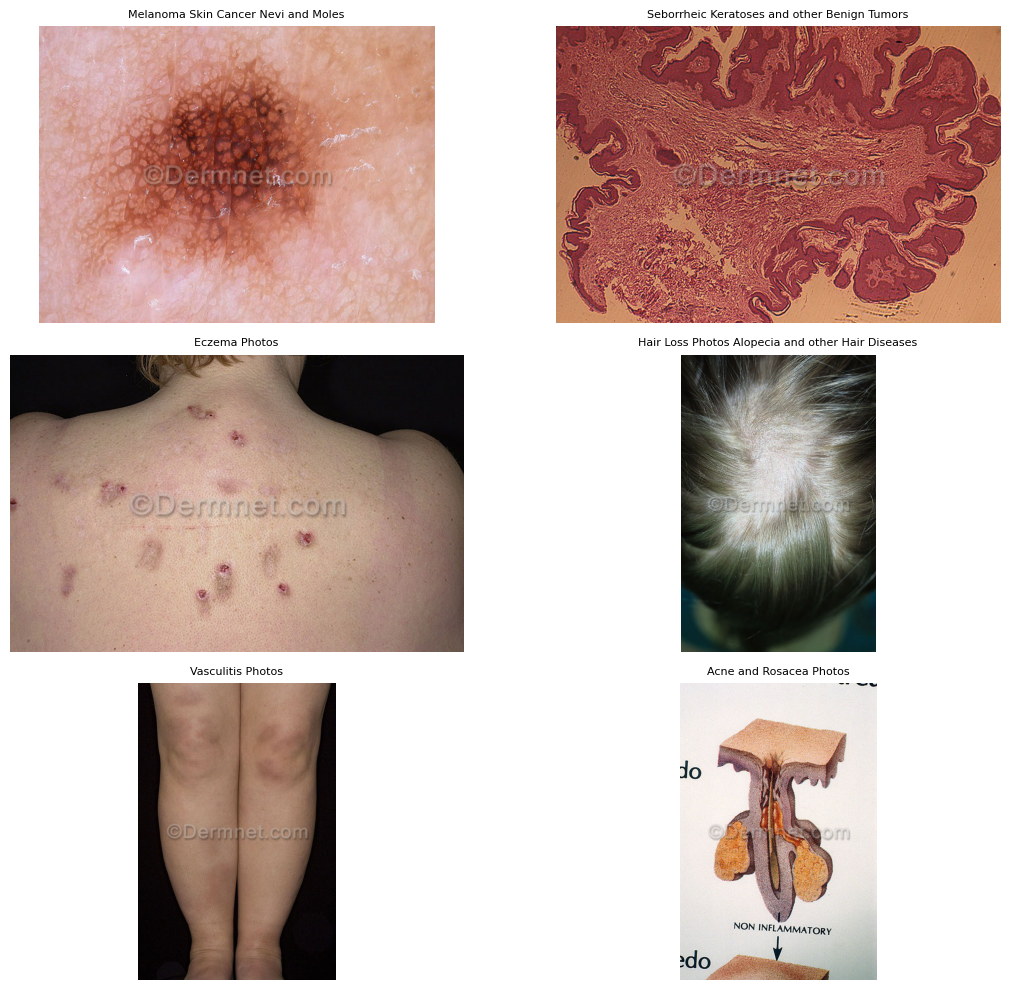

In [3]:
# Step 2: Image Quality Check

import random
from PIL import Image

# pick 6 random classes
sample_classes = random.sample(list(train_counts['class']), 6)

plt.figure(figsize=(12,10))

for i, cls in enumerate(sample_classes, 1):
    class_path = os.path.join(train_dir, cls)
    images = glob.glob(os.path.join(class_path, '*'))

    # pick a random image
    img_path = random.choice(images)
    img = Image.open(img_path)

    plt.subplot(3, 2, i)
    plt.imshow(img)
    plt.title(cls, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

3. Sample Images Per Class

- For each class, display 2 or 3 random images.
- Get a visual understanding of how diseases differ.

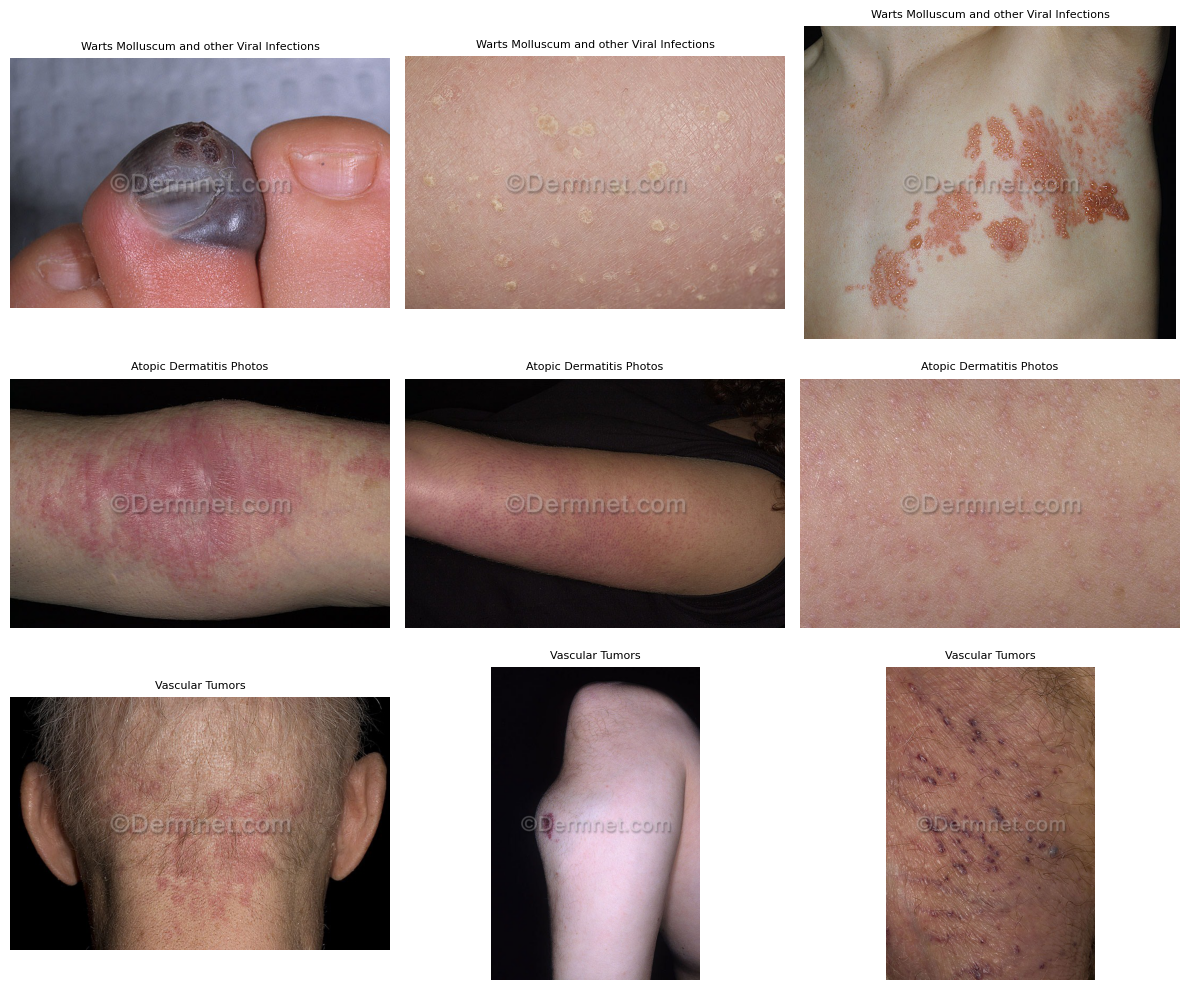

In [4]:
# Step 3 : Sample images per class

import random
from PIL import Image

# choose 3 classes to keep the output readable
selected_classes = random.sample(list(train_counts['class']), 3)

plt.figure(figsize=(12, 10))

index = 1
for cls in selected_classes:
    class_path = os.path.join(train_dir, cls)
    images = glob.glob(os.path.join(class_path, '*'))
    
    # pick 3 images from the class
    sample_imgs = random.sample(images, min(3, len(images)))
    
    for img_path in sample_imgs:
        img = Image.open(img_path)
        plt.subplot(len(selected_classes), 3, index)
        plt.imshow(img)
        plt.title(cls, fontsize=8)
        plt.axis('off')
        index += 1

plt.tight_layout()
plt.show()

4. Data Augmentation Plan

- Identify which augmentations will help:
  - rotation
  - zoom
  - horizontal flip
  - brightness shift
  - shear
- Note which augmentations should not be used if they distort medical meaning.

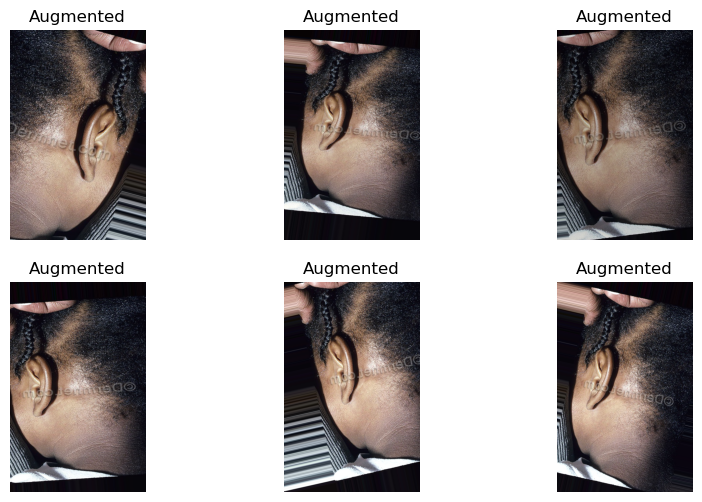

In [5]:
# Step 4 : quiick preview of augmentation effects

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
import random

# pick one random class
cls = random.choice(list(train_counts['class']))
class_path = os.path.join(train_dir, cls)
images = glob.glob(os.path.join(class_path, '*'))
img_path = random.choice(images)

# load image
img = Image.open(img_path)
x = np.array(img)
x = x.reshape((1,) + x.shape)

# define augmentation settings
aug = ImageDataGenerator(
    rotation_range=20, 
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

# generate augmented samples
plt.figure(figsize=(10, 6))
i = 1
for batch in aug.flow(x, batch_size=1):
    plt.subplot(2, 3, i)
    plt.imshow(batch[0].astype('uint8'))
    plt.title('Augmented')
    plt.axis('off')
    i += 1
    if i > 6:
        break

plt.show()

5. Preprocessing Summary

- Final decision on image size.
- Final decision on normalization.
- Final decision on augmentation.

In [6]:
#Step 5 : Store preprocessing decisions

preprocessing_settings = {
    "image_size": (224, 224),
    "color_mode": "rgb",
    "normalization": "rescale=1./255",
    "augmentation": ["rotation", "zoom", "shift", "horizontal_flip", "brightness"],
    "avoid": ["vertical_flip", "large_rotation", "strong_shear"],
    "imbalance_strategy": ["augmentation", "class_weights"]
}

preprocessing_settings

{'image_size': (224, 224),
 'color_mode': 'rgb',
 'normalization': 'rescale=1./255',
 'augmentation': ['rotation',
  'zoom',
  'shift',
  'horizontal_flip',
  'brightness'],
 'avoid': ['vertical_flip', 'large_rotation', 'strong_shear'],
 'imbalance_strategy': ['augmentation', 'class_weights']}